In [59]:
import sys, os, time
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from networkx.utils import arbitrary_element

In [3]:
??arbitrary_element

In [6]:
input_dir = "/Users/lastaw/Documents/3A/algo/comp/public_dataset"
graphs = [ nx.read_adjlist(os.path.join(input_dir, g)) for g in sorted(os.listdir(input_dir))]
len(graphs)

45

In [7]:
g = graphs[0]
g.nodes

NodeView(('0', '4', '5', '6', '7', '8', '1', '2', '9', '3'))

In [11]:
def sample_max_neighbors_node(s):
    if len(s) <=0 return 
    node = None;
    m = 0
    for n in s:
        if len(g[n]) > m:
            node = n
            m = len(g[n])

AtlasView({'4': {}, '5': {}, '6': {}, '7': {}, '8': {}})

In [16]:
set(g)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [27]:
next(iter(g))

'0'

In [16]:
def sample_max_neighbors_node(s):
    if len(s) <=0:
        return 
    node = None;
    m = 0
    for n in s:
        if len(g[n]) > m:
            node = n
            m = len(g[n])
    return node

In [3]:
def arbitrary_element(iterable):
    return next(iter(iterable))

In [17]:
# v3
def dominant(g, start_with=None):
    all_nodes = set(g)
    if start_with is None:
        start_with = sample_max_neighbors_node(all_nodes)
    dominating_set = {start_with}
    dominated_nodes = set(g[start_with])
    remaining_nodes = all_nodes - dominated_nodes - dominating_set
    while remaining_nodes:
        v = sample_max_neighbors_node(remaining_nodes)
        undominated_neighbors = set(g[v]) - dominating_set
        dominating_set.add(v)
        dominated_nodes |= undominated_neighbors
        remaining_nodes -= undominated_neighbors
    return dominating_set

In [33]:
import sys, os, time
import networkx as nx

def dominant(g):
    """
        A Faire:         
        - Ecrire une fonction qui retourne le dominant du graphe non dirigé g passé en parametre.
        - cette fonction doit retourner la liste des noeuds d'un petit dominant de g

        :param g: le graphe est donné dans le format networkx : https://networkx.github.io/documentation/stable/reference/classes/graph.html

    """
    noeuds = set(g)
#     noeud_initial = next(iter(g))
    dominant = set()
#     dominated_nod = set(g[noeud_initial])
    noeuds_restant = noeuds #- dominated_nodes - dominating_set
    while noeuds_restant:
        # Choose an arbitrary node and determine its undominated neighbors.
        v = noeuds_restant.pop()
        voisins_nondomines = set(g[v]) - dominant
        dominant.add(v)
#         dominated_nodes |= undominated_neighbors
        noeuds_restant -= voisins_nondomines
    new_g = nx.Graph()
    for n in dominant:
        new_g.add_node(n)
    return new_g.nodes 


In [ ]:
def dominant(g, start_with=None):
    all_nodes = set(g)
    if start_with is None:
        start_with = arbitrary_element(all_nodes)
    
    dominating_set = set()
    dominated_nodes = set(g[start_with])
    remaining_nodes = all_nodes - dominated_nodes - dominating_set
    while remaining_nodes:
        v = remaining_nodes.pop()
        undominated_neighbors = set(g[v]) - dominating_set
        dominating_set.add(v)
        dominated_nodes |= undominated_neighbors
        remaining_nodes -= undominated_neighbors
    return dominating_set

In [ ]:

def min_dominant(g):
    

In [34]:
d = [dominant(g) for g in graphs]

In [36]:
len(d)

45

In [37]:
nd = [nx.dominating_set(g) for g in graphs]

In [43]:
nd[0]

{'2', '4'}

In [44]:
set(d[0]) == nd[0]

True

In [46]:
c = 0
for k in range(len(graphs)):
    c = c + 1 if set(d[k]) == nd[k] else c + 0
c

20

In [ ]:
if set(d[k]) == nd[k]:
    c += 1
    

In [21]:
from tqdm import tqdm

In [75]:
def dominant1(g):
    """
        A Faire:         
        - Ecrire une fonction qui retourne le dominant du graphe non dirigé g passé en parametre.
        - cette fonction doit retourner la liste des noeuds d'un petit dominant de g

        :param g: le graphe est donné dans le format networkx : https://networkx.github.io/documentation/stable/reference/classes/graph.html

    """
    noeuds = set(g)
    dominant = set()
    noeuds_restant = noeuds 
    while noeuds_restant:
        # Choose an arbitrary node and determine its undominated neighbors.
        v = noeuds_restant.pop()
        voisins_nondomines = set(g[v]) - dominant
        dominant.add(v)
        noeuds_restant -= voisins_nondomines
    new_g = nx.Graph()
    for n in dominant:
        new_g.add_node(n)
    return new_g.nodes 

In [57]:
# v2
def dominant(g):
    """
        A Faire:         
        - Ecrire une fonction qui retourne le dominant du graphe non dirigé g passé en parametre.
        - cette fonction doit retourner la liste des noeuds d'un petit dominant de g

        :param g: le graphe est donné dans le format networkx : https://networkx.github.io/documentation/stable/reference/classes/graph.html

    """
    def sample_max_neighbors_node(s):
        
        node = None
        m = 0
        for n in s:
            if len(g[n]) > m:
                node = n
                m = len(g[n])
        return node
    
#     it = 1
#     print(it)
    all_nodes = set(g)
    start_with = sample_max_neighbors_node(all_nodes)
    dominating_set = {start_with}
    dominated_nodes = set(g[start_with])
    remaining_nodes = all_nodes - dominated_nodes - dominating_set
    
    while remaining_nodes:
#         print(len(remaining_nodes))
        v = sample_max_neighbors_node(remaining_nodes)
        remaining_nodes.remove(v)
        undominated_neighbors = set(g[v]) - dominating_set
        dominating_set.add(v)
        dominated_nodes |= undominated_neighbors
        remaining_nodes -= undominated_neighbors
    
    new_g = nx.Graph()
    for n in dominating_set:
        new_g.add_node(n)
    return new_g.nodes 


In [55]:
dominant(graphs[0])

3


NodeView(('1', '4'))

In [95]:
d = [dominant(g) for g in graphs]
lend = [len(k) for k in d]

In [72]:
nxd = [nx.dominating_set(g) for g in graphs]
lennxd = [len(k) for k in nxd]

In [76]:
d1 = dominant1
d1 = [dominant1(g) for g in graphs]
lend1 = [len(k) for k in d1]

In [67]:
%matplotlib inline

score: 32.43


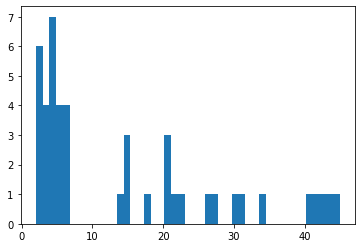

In [96]:
print(f"score: {score(lend)}")
plt.hist(lend, bins=45)
plt.show()

score: 28.480000000000004


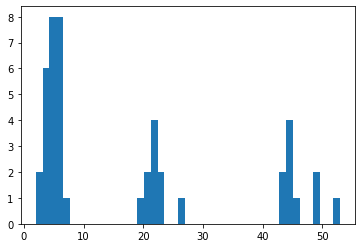

In [91]:
print(f"score: {score(lend1)}")
plt.hist(lend1, bins=45)
plt.show()

score: 28.389999999999993


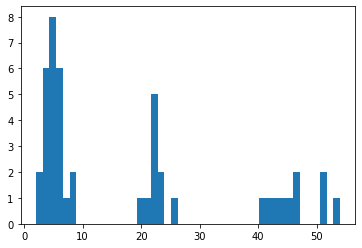

In [94]:
print(f"score: {score(lennxd)}")
plt.hist(lennxd, bins=45)
plt.show()

In [87]:
def score(l):
    c = 0
    for k in range(len(graphs)):
        c = c + 1 - l[k]/len(graphs[k])
    return c